In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Generating the synthetic data
np.random.seed(23)
X = np.random.normal(size=(50,10))
y = X.dot(np.random.normal(size=10)) + np.random.random(size=50)

In [235]:
np.random.seed(23)
X = np.random.normal(size=(500000,1))
y = X.dot(np.random.normal(size=1)) + np.random.random(size=500000)

In [197]:
X.shape

(500, 1)

In [185]:
y.shape

(500,)

In [237]:
# Splitting the train test data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [239]:
# Fit OLS model and calculate the mean squared error
ols = LinearRegression().fit(X_train, y_train)
mse_ols = mean_squared_error(y_true = y_test, y_pred = ols.predict(X_test))

In [241]:
mse_ols

0.08337055825089552

In [243]:
r2_ols = r2_score(y_true = y_test, y_pred = ols.predict(X_test))

In [245]:
r2_ols

0.9298458329541694

In [259]:
ols.coef_

array([-1.05298012])

In [261]:
ols.intercept_

0.5011219104577733

In [249]:
# Fit Ridge model and calculate the mean squared error
ridge = Ridge(alpha=0.856).fit(X_train, y_train)
mse_ridge = mean_squared_error(y_true = y_test, y_pred = ridge.predict(X_test))

In [251]:
mse_ridge

0.08337055590542056

In [263]:
ridge.intercept_

0.501121912357376

In [253]:
r2_ridge = r2_score(y_true = y_test, y_pred = ridge.predict(X_test))
r2_ridge

0.929845834927826

In [255]:
ridge.coef_

array([-1.05297786])

In [219]:
# calculating the alpha 
mse_list = []
for i in np.arange(0,2,0.1):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    mse_ridge = mean_squared_error(y_true = y_test, y_pred = ridge.predict(X_test))
    mse_list.append(mse_ridge)

[0.08834220575779649,
 0.08824038959781147,
 0.08813920026757835,
 0.08803863673380348,
 0.08793869796495123,
 0.08783938293123912,
 0.08774069060463591,
 0.08764261995885728,
 0.08754516996936278,
 0.08744833961335267,
 0.08735212786976422,
 0.08725653371926903,
 0.08716155614426908,
 0.08706719412889381,
 0.08697344665899695,
 0.0868803127221526,
 0.08678779130765289,
 0.08669588140650389,
 0.08660458201142301,
 0.08651389211683533]

Text(0, 0.5, 'MSE: Error')

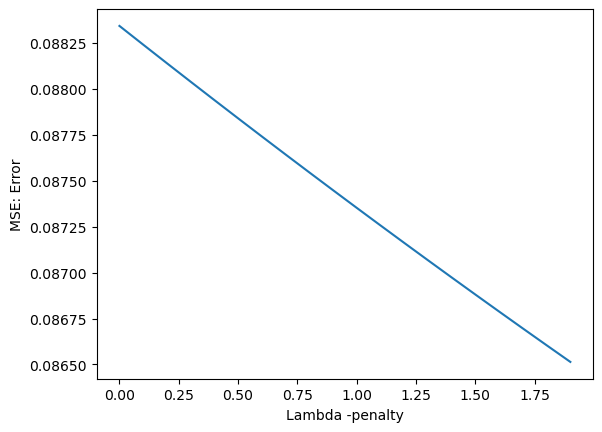

In [221]:
irange = np.arange(0,2,0.1)
plt.plot(irange, mse_list)
plt.xlabel("Lambda -penalty")
plt.ylabel("MSE: Error")

In [ ]:
plt.scatter(y_test, 

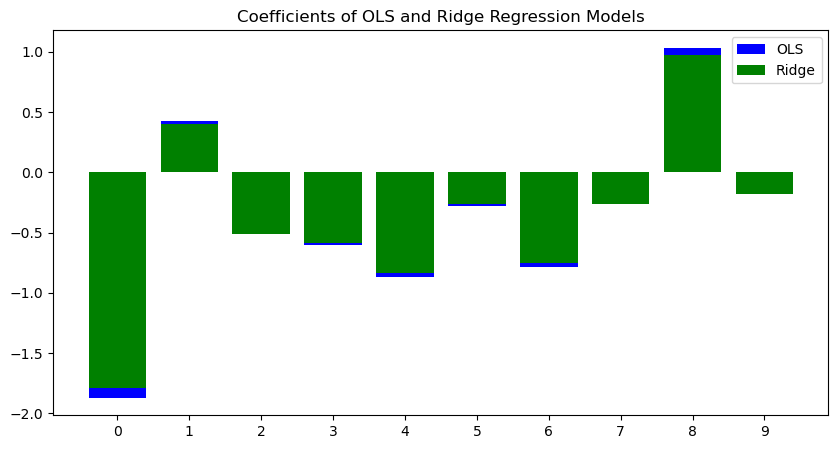

In [179]:
# Plot the coefficients of the two models
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), ols.coef_, color='blue', label='OLS')
plt.bar(range(X.shape[1]), ridge.coef_, color='green', label='Ridge')
plt.xticks(range(X.shape[1]))
plt.legend()
plt.title('Coefficients of OLS and Ridge Regression Models')
plt.show()

The plot shows that compared to the coefficients of the Ridge Regression model, those of the OLS model are bigger in magnitude and have a wider range. 
As a result, it can be concluded that the OLS model outperforms the Ridge Regression model in terms of variance and sensitivity to data noise.

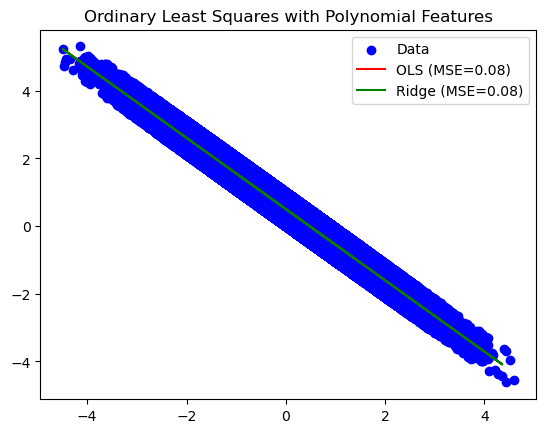

In [257]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ols.predict(X_test), color='red', label=f'OLS (MSE={mse_ols:.2f})')
plt.plot(X_test, ols.predict(X_test), color='green', label=f'Ridge (MSE={mse_ridge:.2f})')
plt.legend()
plt.title('Ordinary Least Squares with Polynomial Features')
plt.show()

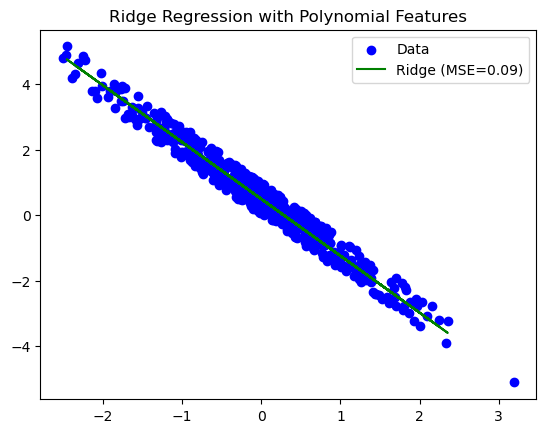

In [231]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ols.predict(X_test), color='green', label=f'Ridge (MSE={mse_ridge:.2f})')
plt.legend()
plt.title('Ridge Regression with Polynomial Features')
plt.show()